In [219]:
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from cartopy import crs as ccrs
from geodatasets import get_path
from shapely.geometry import Point, Polygon

In [228]:
# Reading in
df = pd.read_csv('data/get_states/states_2024-04-28T00:31:32.098124.csv') 
df = df[df['on_ground'] == False] #Excluding Taxiing Aircraft
df['x_speed'] = np.sin(np.deg2rad(df['true_track']))*df['velocity']
df['y_speed'] = np.cos(np.deg2rad(df['true_track']))*df['velocity']
df.head(3)

,Unnamed: 0,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,...,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category,x_speed,y_speed
0,0,ab1644,UAL1257,United States,1.714264e+09,1714264282,-120.1987,46.4316,10957.56,False,...,309.60,0.00,NaN,10911.84,NaN,False,0,0,-154.842341,128.096725
1,1,a5a8e2,LN464EG,United States,1.714264e+09,1714264281,-117.4491,47.7082,1181.10,False,...,169.20,-2.93,NaN,1158.24,NaN,False,0,0,16.976747,-88.995225
2,2,80162a,IGO7193,India,1.714264e+09,1714264282,79.9547,12.7324,2209.80,False,...,211.73,4.23,NaN,2209.80,NaN,False,0,0,-48.352815,-78.198267


In [ ]:
# Creating Aircraft Data List of Tuples
aircraft = [(x,y,vx,vy,country) for x,y,vx,vy,country in zip(df['longitude'],df['latitude'],df['x_speed'],df['y_speed'],df['origin_country'])]

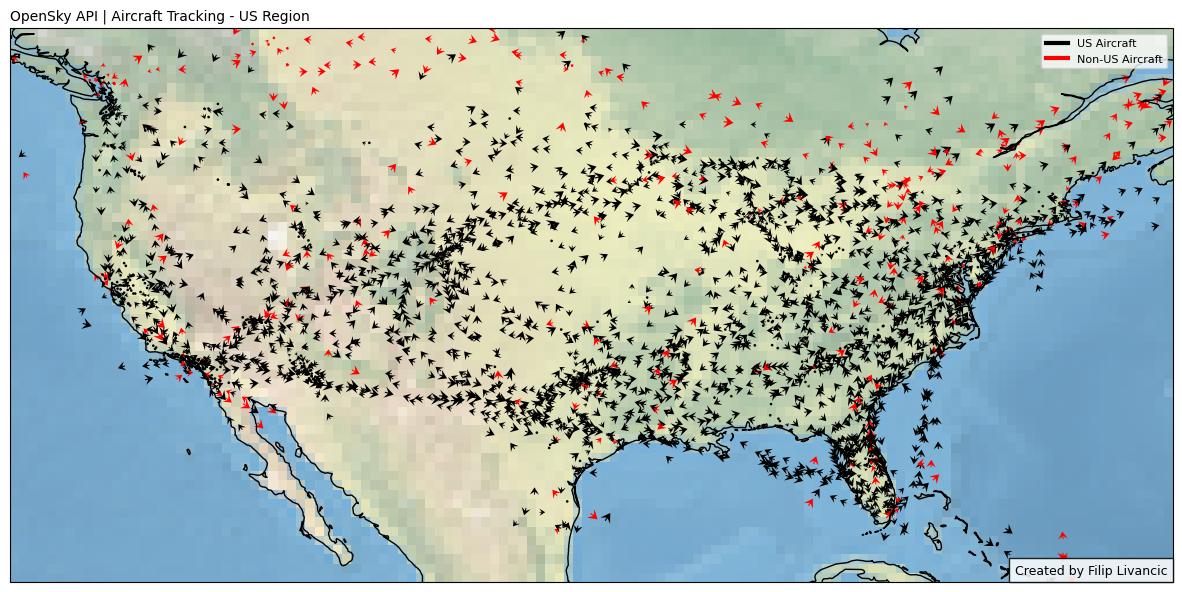

In [224]:
# Plotting Positional Data For United States
plt.figure(figsize =(15,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent([-128, -65, 22, 52], crs=ccrs.PlateCarree())
ax.set_title('OpenSky API | Aircraft Tracking - US Region',loc='left', fontsize=10)

legend_handle = [
    Line2D([0],[0], color='black', lw=3, label='US Aircraft'),
    Line2D([0],[0], color='red', lw=3, label='Non-US Aircraft'),
]

for x, y, vx, vy,country in aircraft:
    if country == 'United States':
        color='black'
    else:
        color='red'
    plt.quiver(
        x, y, vx, vy, 
        transform=ccrs.PlateCarree(), 
        headwidth=10,
        headaxislength=5,
        headlength=8,
        width=0.0025,
        scale=35000,
        color=color
    )
ax.text(x=0.9955,y=0.0095, s='Created by Filip Livancic', transform=ax.transAxes, bbox=dict(facecolor='white',alpha=0.85), va='bottom',ha='right', fontsize=9)
ax.legend(handles=legend_handle,loc='upper right', title_fontsize=9,fontsize=8)

plt.show()

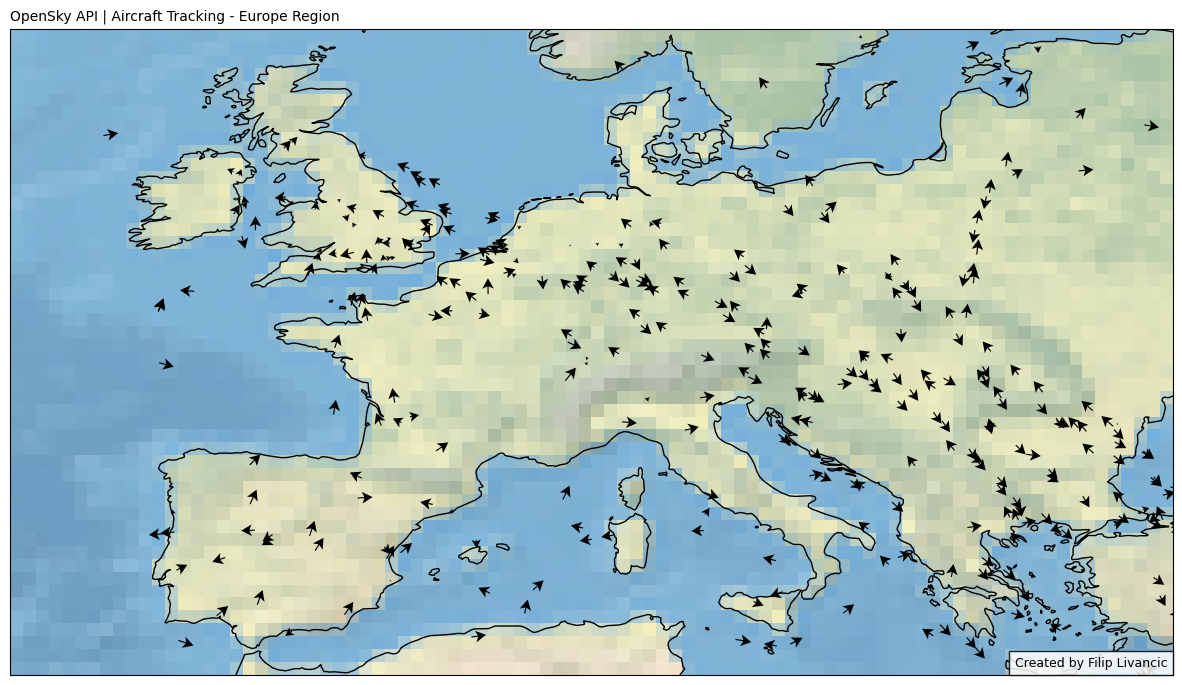

In [225]:
# Plotting Positional Data For Europe
plt.figure(figsize =(15,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent([-15,30,35,60], crs=ccrs.PlateCarree())
ax.set_title('OpenSky API | Aircraft Tracking - Europe Region',loc='left', fontsize=10)

for x, y, vx, vy,country in aircraft:
    plt.quiver(
        x, y, vx, vy, 
        transform=ccrs.PlateCarree(), 
        headwidth=10,
        headaxislength=7,
        headlength=9,
        width=0.001,
        scale=20000,
        color='black'
    )
ax.text(x=0.9955,y=0.0085, s='Created by Filip Livancic', transform=ax.transAxes, bbox=dict(facecolor='white',alpha=0.85), va='bottom',ha='right', fontsize=9)

plt.show()